# Đồ án cuối kì Lập Trình Cho Khoa Học Dữ Liệu 

## Danh sách các thành viên
| Họ và tên | MSSV | Link github | Mức độ hoàn thành công việc | 
| --- | --- | --- | --- | 
| Vương Thành An | 19127326 | https://github.com/vuongthanhan-19127326 | 33% | 
| Trần Minh Thiện | 19127281 | https://github.com/MinhThien285 |33% |
| Lê Tâm Anh | 19127330 | https://github.com/letamanh-19127330 | 33% |

## Link github của đồ án:
https://github.com/vuongthanhan-19127326/dackltkhdl

## Mục lục
- Hướng dẫn chạy Project
- Thu thập dữ liệu
  + Dữ liệu của bạn làm về chủ đề gì ? Bạn lấy được nguồn của dữ liệu từ đâu?
  + Tác giả có cho phép bạn được sử dụng dữ liệu của họ không ?
  + Làm thế nào để tác giả thu thập được những dữ liệu này?
- Khám phá dữ liệu
  + Dữ liệu có bao nhiêu dòng và bao nhiêu cột?
  + Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?
  + Dữ liệu có các dòng bị lặp không?
  + Mỗi cột có ý nghĩa gì?
  + Dữ liệu có bị thiếu hay không?
  + Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?
  + Với mỗi cột có kiểu dữ liệu dạng numeric, các giá trị được phân bố như thế nào?
  + Với mỗi cột có kiểu dữ liệu dạng categorical, các giá trị được phân bố như thế nào?
- Đặt ra các câu hỏi có ý nghĩa? Giải thích về lợi ích của việc trả lời các câu hỏi này.

- Tiền xử lí và phân tích câu hỏi
  + Phân tích câu hỏi bằng code 
  - Kết quả nhận được từ cho câu hỏi 
- Nhìn lại
- Nguồn tham khảo

## Hướng dẫn chạy project:

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install math

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement math
ERROR: No matching distribution found for math


In [3]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install datetime

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install warnings

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement warnings
ERROR: No matching distribution found for warnings


Kernel-> Restart and Run all

In [8]:
import sys
sys.executable

'D:\\Anaconda\\python.exe'

### Import các thư viện cần thiết

In [9]:
import pandas as pd
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
import warnings
from matplotlib.ticker import MaxNLocator
warnings.filterwarnings("ignore")
%matplotlib inline

## 1. Thu thập dữ liệu

### Dữ liệu của bạn làm về chủ đề gì ? Bạn lấy được nguồn của dữ liệu từ đâu?
   - Đồ án nói về dữ liệu tai nạn xe hơi trên toàn quốc của nước Mỹ từ năm 2016-2020. 
   - Dữ liệu này thuộc về nhà khoa học Sobhan Moosavi. 
   - Các tập tài liệu sử dụng trong dữ liệu này gồm :Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy và Rajiv Ramnath. “ Tập dữ liệu về tai nạn giao thông trên toàn quốc .”, 2019. Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu và Rajiv Ramnath. "Dự đoán rủi ro tai nạn dựa trên Dữ liệu thưa thớt không đồng nhất: Tập * dữ liệu mới và thông tin chi tiết." Trong kỷ yếu của Hội nghị quốc tế ACM SIGSPATIAL lần thứ 27 về những tiến bộ trong hệ thống thông tin địa lý, ACM, 2019.

### Tác giả có cho phép bạn được sử dụng dữ liệu của họ không ?
   - Theo như điều khoản của chủ sở hữu thì data được chia sẻ rộng rãi và mục đích học tập, nghiên cứu không vi phạm điều khoản cảu chủ sỡ hữu đưa ra

### Làm thế nào để tác giả thu thập được những dữ liệu này?
   - Trích lời tác giả về cách thu thập dữ liệu: Đây là tập dữ liệu về tai nạn xe hơi trên toàn quốc, bao gồm 49 tiểu bang của Hoa Kỳ . Dữ liệu tai nạn được thu thập từ tháng 2 năm 2016 đến tháng 12 năm 2020 , sử dụng nhiều API cung cấp dữ liệu sự cố (hoặc sự kiện) giao thông trực tuyến. Các API này truyền phát dữ liệu giao thông được thu thập bởi nhiều thực thể, chẳng hạn như bộ giao thông vận tải Hoa Kỳ và tiểu bang, cơ quan thực thi pháp luật, camera giao thông và cảm biến giao thông trong mạng lưới đường bộ. Hiện tại, có khoảng 1,5 triệu hồ sơ tai nạn trong bộ dữ liệu này

In [10]:
np.set_printoptions(suppress=True)

In [11]:
accidents_df = pd.read_csv('US_Accidents_Dec20_updated.csv',error_bad_lines=False)
accidents_df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day


## 2. Khám phá dữ liệu

## Dữ liệu gồm có bao nhiêu dòng và bao nhiêu cột? 

In [12]:
num_rows,num_cols=accidents_df.shape
print('Dữ liệu bao gồm: {} dòng và {} cột'.format(num_rows,num_cols))

Dữ liệu bao gồm: 1516064 dòng và 47 cột


## Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Mỗi dòng thể hiện các thông tin về các vụ tai nạn xe hơi thuộc 49 tiểu bang của Hoa Kỳ. Có vẻ không có dòng nào khác loài.

## Dữ liệu có các dòng bị lặp không? 

In [13]:
have_duplicated_rows=accidents_df.duplicated().any()
print(have_duplicated_rows)

False


## Mỗi cột có ý nghĩa gì?

•  ID: Số nhận dạng (duy nhất) của các hồ sơ vụ tai nạn.

•  Severity: Mức độ nghiêm trọng của vụ tai nạn tác động đến giao thông, được tính theo 4 mức từ 1 đến 4 
   + Mức độ 1: Tai nạn rất nhỏ những người trong vụ tai nạn hầu như không bị thương và hư hỏng về tài sản
   + Mức độ 2: Tai nạn nhỏ có một hoặc nhiều người trong vụ tai nạn nặng lắm thì chỉ cần dùng những thuốc sử dụng nhanh như băng keo, bông băng, thuốc đỏ thì có thể tiếp tục công việc của mình mà không bị chấn thương gì và mức độ hư hỏng về tài sản có thể nhiều hơn so với mức độ 1 
   + Mức độ 3: Tai nạn là cho có ít nhất một người buộc phải được đưa vào cấp cứu bệnh viện để chữa trị 
   + Mức độ 4: Có ít nhất một người chết trong vụ tai nạn giao thông đó, cho dù có được đưa vào bệnh viện xong rồi mất thì vẫn tính vào

•  Start_Time: Thời gian xảy ra vụ tai nạn (tính theo múi giờ địa phương)

•  End_Time: Thời gian vụ tai nạn kết thúc (kết thúc ở đây có nghĩa là vụ tai nạn không còn làm ảnh hưởng đến giao thông)

•  Start_Lat: Vĩ độ vụ tai nạn trong định vị GPS của điểm bắt đầu.

•  Start_Lng: Kinh độ vụ tai nạn trong định vị GPS của điểm bắt đầu.

•  End_Lat: Vĩ độ vụ tai nạn trong định vị GPS của điểm kết thúc.

•  End_Lng: Kinh độ vụ tai nạn trong định vị GPS của điểm kết thúc.

•  Distance(mi): Chiều dài của đoạn đường bị ảnh hưởng bởi vụ tai tạn.

•  Description: Mô tả vụ tai nạn.

•  Number: Số của con đường trong bản định danh.

•  Street: Tên của con đường trong bản đinh danh.

•  Side: Vụ tai nạn xảy ra ở phía (phải/trái) của con đường.

•  City: Tên thành phố xảy ra vụ tai nạn.

•  County: Tên quận xảy ra vụ tai nạn.

•  State: Trạng thái trong bản ghi địa chỉ.

•  Zipcode: Mã zip trong bản ghi địa chỉ.

•  Country: Tên quốc gia có vụ tai nạn.

•  Timezone: Múi giờ của nơi xảy ra vụ tại nạn.

•  Airport_Code: Mã của trạm thời tiết tại sân bay gần nhất với vị trí xảy ra tai nạn.

•  Weather_Timestamp: Dấu thời gian của bản ghi thời tiết theo múi giờ địa phương.

•  Temperature (F): Nhiệt độ lúc xảy ra tai nạn.

•  Wind_Chill (F): Gió lạnh lúc xảy ra tai nạn.

•  Humidity (%): Độ ẩm lúc xảy ra tai nạn.

•  Pressure (inches): Áp suất không khí lúc xảy ra tai nạn.

•  Visibility (miles): Tầm nhìn lúc xảy ra tai nạn.

•  Wind_Direction: Hướng gió lúc xảy ra tai nạn.

•  Wind_Speed (mph): Tốc độ gió lúc xảy ra tai nạn(miles/hour).

•  Precipitation (inches): Lượng mưa lúc xảy ra tai nạn.

•  Weather_Condition: Trạng thái thời tiết lúc xảy ra tai nạn (mưa, bão, tuyết rơi,…)

•  Amenity: Sự tiện nghi của một khu vực ở gần vụ tai nạn.

•  Bump: Có biển báo của gờ giảm tốc hoặc các gờ ở gần vị trí xảy ra vụ tai nạn hay không.

•  Crossing: Có biển báo người qua đường của các đường ở gần vụ tai nạn hay không.

•  Give_Way: Có biển báo nhường đường ở vị trí gần vụ tai nạn hay không.

•  Junction: Có biển báo đường giao nhau ở vị trí gần vụ tai nạn hay không.

•  No_Exit: Có biển báo cấm đi vào ở gần vụ tai nạn hay không.

•  Railway: Có biển báo đường sắt ở gần vụ tai nạn hay không.

•  Roundabout: Có sự hiện diện của bùng binh ở gần vị trí vụ tai nạn hay không.

•  Station: Có sự hiện diện của trạm ở gần vị trí vụ tai nạn hay không.

•  Stop: Có biển báo dừng ở gần vị trí vụ tai nạn hay không.

•  Traffic_Calming: Có sự hiện diện của các thiết kế vật lý trên đường nhằm hạn chế tốc độ ở gần vị trí vụ tai nạn hay không.

•  Traffic_Signal: Có sự hiện diện của đèn giao thông ở gần vị trí vụ tai nạn hay không.

•  Turning_Loop: Có sự hiện diện của khúc quoanh ở gần vị trí vụ tai nạn hay không.

•  Sunrise_Sunset: Hiển thị khoảng thời gian dựa theo mặt trời mọc hay lặn.

•  Civil_Twilight: Hiển thị khoảng thời gian dựa theo hoàng hôn dân sự.

•  Nautical_Twilight: Hiển thị khoảng thời gian dựa theo hoàng hôn hàng hải.

•  Astronomical_Twilight: Hiển thị khoảng thời gian dựa theo hoàng hôn thiên văn.

## Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [14]:
col_dtypes=accidents_df.dtypes
print(col_dtypes)

ID                        object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity   

In [15]:
def open_object_dtype(s):
    df=pd.Series(s)
    a=df.apply(lambda x : type(x)).unique()
    dtypes = set(a)
    return dtypes

In [16]:
objects_key=(accidents_df.loc[:, accidents_df.dtypes == object]).keys()
print("numer of object columns:",len(objects_key))
for key in objects_key:
    print("types of ",key," is ",open_object_dtype(accidents_df[key]))

numer of object columns: 20
types of  ID  is  {<class 'str'>}
types of  Start_Time  is  {<class 'str'>}
types of  End_Time  is  {<class 'str'>}
types of  Description  is  {<class 'str'>}
types of  Street  is  {<class 'str'>}
types of  Side  is  {<class 'str'>}
types of  City  is  {<class 'str'>, <class 'float'>}
types of  County  is  {<class 'str'>}
types of  State  is  {<class 'str'>}
types of  Zipcode  is  {<class 'str'>, <class 'float'>}
types of  Country  is  {<class 'str'>}
types of  Timezone  is  {<class 'str'>, <class 'float'>}
types of  Airport_Code  is  {<class 'str'>, <class 'float'>}
types of  Weather_Timestamp  is  {<class 'str'>, <class 'float'>}
types of  Wind_Direction  is  {<class 'str'>, <class 'float'>}
types of  Weather_Condition  is  {<class 'str'>, <class 'float'>}
types of  Sunrise_Sunset  is  {<class 'str'>, <class 'float'>}
types of  Civil_Twilight  is  {<class 'str'>, <class 'float'>}
types of  Nautical_Twilight  is  {<class 'str'>, <class 'float'>}
types of  A

## Tiền xử lí

### Chuyển dtype của cột "Date" sang datetime

In [17]:
datetime_cols=['Start_Time','End_Time','Weather_Timestamp']
for key in datetime_cols:
    accidents_df[key]= pd.to_datetime(accidents_df[key])

### Chuyển dtype của các cột object bao gồm float và string sang kiểu dữ liệu string

- Do các cột object có kiểu dữ liệu bao gồm cả string và float sẽ có những số ghép với những chữ do đó em chuyển tất cả những cột mà có kiểu object là string and float về thành string hết

In [18]:
object_string_cols=['City','Zipcode','Weather_Timestamp','Zipcode','Airport_Code','Wind_Direction',
                   'Weather_Condition','Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight']
accidents_df[object_string_cols]=accidents_df[object_string_cols].astype('string')

In [19]:
print(accidents_df.dtypes)

ID                               object
Severity                          int64
Start_Time               datetime64[ns]
End_Time                 datetime64[ns]
Start_Lat                       float64
Start_Lng                       float64
End_Lat                         float64
End_Lng                         float64
Distance(mi)                    float64
Description                      object
Number                          float64
Street                           object
Side                             object
City                             string
County                           object
State                            object
Zipcode                          object
Country                          object
Timezone                         object
Airport_Code                     string
Weather_Timestamp                string
Temperature(F)                  float64
Wind_Chill(F)                   float64
Humidity(%)                     float64
Pressure(in)                    float64


## Với mỗi cột có kiểu dữ liệu dạng numeric, các giá trị được phân bố như thế nào?

In [20]:
numeric_cols=['Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Number', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)']

all_num_cols=['Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Number', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)','Start_Time','End_Time','Weather_Timestamp']

nume_col_profiles_df=pd.DataFrame(index=['missing_ratio','min','max'],
                                  columns=all_num_cols)

nume_col_profiles_df.loc['missing_ratio',numeric_cols]=np.float64(accidents_df[numeric_cols].isna().mean()*100)

nume_col_profiles_df.loc['min',numeric_cols]=np.float64(accidents_df[numeric_cols].min())

nume_col_profiles_df.loc['max',numeric_cols]=np.float64(accidents_df[numeric_cols].max())

nume_col_profiles_df=nume_col_profiles_df.astype(np.float64)




nume_col_profiles_df.loc['missing_ratio',datetime_cols]=accidents_df[datetime_cols].isna().mean()*100

nume_col_profiles_df.loc['min',datetime_cols]=accidents_df[datetime_cols].min()

nume_col_profiles_df.loc['max',datetime_cols]=accidents_df[datetime_cols].max()

print(nume_col_profiles_df)


               Start_Lat   Start_Lng   End_Lat     End_Lng  Distance(mi)  \
missing_ratio   0.000000    0.000000   0.00000    0.000000         0.000   
min            24.570222 -124.497567  24.57011 -124.497829         0.000   
max            49.000580  -67.113167  49.07500  -67.109242       155.186   

                     Number  Temperature(F)  Wind_Chill(F)  Humidity(%)  \
missing_ratio  6.900072e+01        2.838469      29.637007     3.001786   
min            0.000000e+00      -89.000000     -89.000000     1.000000   
max            9.999997e+06      170.600000     113.000000   100.000000   

               Pressure(in)  Visibility(mi)  Wind_Speed(mph)  \
missing_ratio      2.392643         2.91617         8.499773   
min                0.000000         0.00000         0.000000   
max               58.040000       140.00000       984.000000   

               Precipitation(in)           Start_Time             End_Time  \
missing_ratio          33.675953                  0.0      

Giá trị trung bình của Temperature:  59.5845967939567 F
Giá trị trung vị của Temperature:  61.0 F
Mode of Temperature:  59.0 F


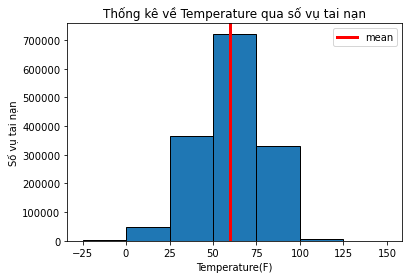

In [21]:
#Cột Temperature(F)
Mean = accidents_df['Temperature(F)'].mean()
Median = accidents_df['Temperature(F)'].median()
Mode = accidents_df['Temperature(F)'].mode()
print("Giá trị trung bình của Temperature: ", Mean,"F")
print("Giá trị trung vị của Temperature: ",Median,"F")
print("Mode of Temperature: ",Mode[0],"F")

#Vẽ biểu đồ histogram để khám phá độ phân bố của nhiêt độ
hist = plt.hist(accidents_df['Temperature(F)'],[-25,0,25,50,75,100,125,150], edgecolor = 'black')
plt.xlabel('Temperature(F)')
plt.ylabel("Số vụ tai nạn")
plt.title("Thống kê về Temperature qua số vụ tai nạn")
plt.axvline(Mean, color ='red',linewidth = 3, linestyle = 'solid',label = 'mean')
plt.legend()

Qua đây ta có thể thấy nhiệt độ trung bình của mỗi vụ tai nạn nằm ở mức 60 độ F thì nếu chuyển sang độ C thì độ C= (60-32)/(5/9)= 15.56 độ C đây được xem là một nhiệt độ bình thường ở nước Mỹ không nóng cũng không lạnh như vậy có vẻ nhiệt độ tăng hoặc giảm cũng không ảnh hưởng đến việc các vụ tai nạn gia tăng

Giá trị trung bình của Wind Chill:  55.10976003705403 F
Giá trị trung vị Wind Chill:  57.0 F
Mode of Wind Chill:  57.0 F


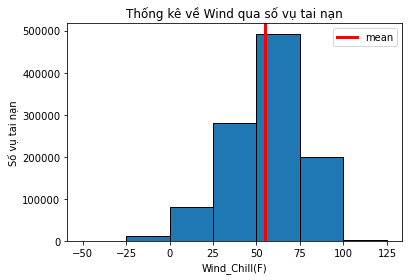

In [22]:
#Cột Win chill(F)
Mean = accidents_df['Wind_Chill(F)'].mean()
Median = accidents_df['Wind_Chill(F)'].median()
Mode = accidents_df['Wind_Chill(F)'].mode()
print("Giá trị trung bình của Wind Chill: ", Mean,"F")
print("Giá trị trung vị Wind Chill: ",Median,"F")
print("Mode of Wind Chill: ",Mode[0],"F")

#Vẽ biểu đồ histogram để khám phá độ phân bố của gió lạnh
hist = plt.hist(accidents_df['Wind_Chill(F)'],[-50,-25,0,25,50,75,100,125], edgecolor = 'black')
plt.xlabel('Wind_Chill(F)')
plt.ylabel("Số vụ tai nạn")
plt.title("Thống kê về Wind qua số vụ tai nạn")
plt.axvline(Mean, color ='red',linewidth = 3, linestyle = 'solid',label = 'mean')
plt.legend()

Giá trị trung bình của Humidity:  64.65960130698954 %
Giá trị trung vị Humidity:  68.0 %
Mode of Humidity:  93.0 %


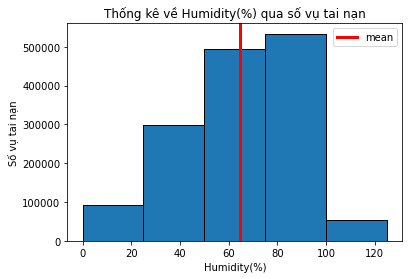

In [23]:
#Cột Humidity(%)
Mean = accidents_df['Humidity(%)'].mean()
Median = accidents_df['Humidity(%)'].median()
Mode = accidents_df['Humidity(%)'].mode()
print("Giá trị trung bình của Humidity: ", Mean,"%")
print("Giá trị trung vị Humidity: ",Median,"%")
print("Mode of Humidity: ",Mode[0],"%")

#Vẽ biểu đồ histogram để khám phá độ phân bố của độ ẩm
hist = plt.hist(accidents_df['Humidity(%)'],[0,25,50,75,100,125], edgecolor = 'black')
plt.xlabel('Humidity(%)')
plt.ylabel("Số vụ tai nạn")
plt.title("Thống kê về Humidity(%) qua số vụ tai nạn")
plt.axvline(Mean, color ='red',linewidth = 3, linestyle = 'solid',label = 'mean')
plt.legend()

Theo em tìm hiểu thì nếu độ ảm thấp thì khi đó con người bị thiếu nước mệt mỏi thì mới dẫn đến mệt mỏi, mất tập trung rồi gây ra tai nạn tuy nhiên trung bình độ ẩm cũng ở mức giữa giữa không quá lệch về một bênh nào cũng chưa thể kết luận độ ẩm tăng hoặc giảm thì sẽ làm tăng số lượng tai nạn xe

Giá trị trung bình của Pressure:  29.554954405696044 inches
Giá trị trung vị Pressure:  29.88 inches
Mode of Pressure:  29.96 inches


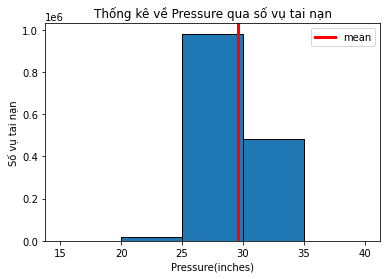

In [24]:
#Cột Pressure(inches)
Mean = accidents_df['Pressure(in)'].mean()
Median = accidents_df['Pressure(in)'].median()
Mode = accidents_df['Pressure(in)'].mode()
print("Giá trị trung bình của Pressure: ", Mean,"inches")
print("Giá trị trung vị Pressure: ",Median,"inches")
print("Mode of Pressure: ",Mode[0],"inches")

#Vẽ biểu đồ histogram để khám phá độ phân bố của áp suất không khí
hist = plt.hist(accidents_df['Pressure(in)'],[15,20,25,30,35,40], edgecolor = 'black')
plt.xlabel('Pressure(inches)')
plt.ylabel("Số vụ tai nạn")
plt.title("Thống kê về Pressure qua số vụ tai nạn")
plt.axvline(Mean, color ='red',linewidth = 3, linestyle = 'solid',label = 'mean')
plt.legend()

Giá trị trung bình của Wind speed:  7.63081245557609 mph
Giá trị trung vị Wind speed:  7.0 mph
Mode of Wind speed:  0.0 mph


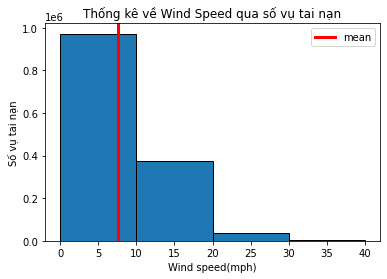

In [25]:
#Cột Wind_Speed(mph)
Mean = accidents_df['Wind_Speed(mph)'].mean()
Median = accidents_df['Wind_Speed(mph)'].median()
Mode = accidents_df['Wind_Speed(mph)'].mode()
print("Giá trị trung bình của Wind speed: ", Mean,"mph")
print("Giá trị trung vị Wind speed: ",Median,"mph")
print("Mode of Wind speed: ",Mode[0],"mph")

#Vẽ biểu đồ histogram để khám phá độ phân bố của tốc độ gió
hist = plt.hist(accidents_df['Wind_Speed(mph)'],[0,10,20,30,40], edgecolor = 'black')
plt.xlabel('Wind speed(mph)')
plt.ylabel("Số vụ tai nạn")
plt.title("Thống kê về Wind Speed qua số vụ tai nạn")
plt.axvline(Mean, color ='red',linewidth = 3, linestyle = 'solid',label = 'mean')
plt.legend()

Trung bình Wind speed nếu đổi sang km/h thì khoảng 12km/h một con số không hề lớn chứng tỏ Tốc độ gió không phải là nguyên nhân chủ yếu gây ra các vụ tai nạn

Giá trị trung bình của Precipitation:  0.008477854631715338 inches
Giá trị trung vị Precipitation:  0.0 inches
Mode of Precipitation:  0.0 inches


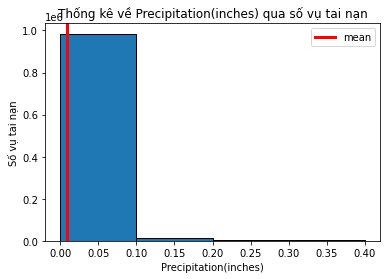

In [26]:
#Cột Precipitation(in)
Mean = accidents_df['Precipitation(in)'].mean()
Median = accidents_df['Precipitation(in)'].median()
Mode = accidents_df['Precipitation(in)'].mode()
print("Giá trị trung bình của Precipitation: ", Mean,"inches")
print("Giá trị trung vị Precipitation: ",Median,"inches")
print("Mode of Precipitation: ",Mode[0],"inches")

#Vẽ biểu đồ histogram để khám phá độ phân bố của lượng mưa
hist = plt.hist(accidents_df['Precipitation(in)'],[0,0.1,0.2,0.3,0.4], edgecolor = 'black')
plt.xlabel('Precipitation(inches)')
plt.ylabel("Số vụ tai nạn")
plt.title("Thống kê về Precipitation(inches) qua số vụ tai nạn")
plt.axvline(Mean, color ='red',linewidth = 3, linestyle = 'solid',label = 'mean')
plt.legend()

Lượng mưa trung bình của mỗi vụ tai nạn là xấp xỉ 0.001 inches rất nhỏ nên chúng ta có thể kết luận lượng mưa không phải là nguyên nhân chủ yếu gây ra các vụ tai nạn

Giá trị trung bình của Visibility:  9.13175505298399 miles
Median of Visibility:  10.0 miles
Mode of Visibility:  10.0 miles


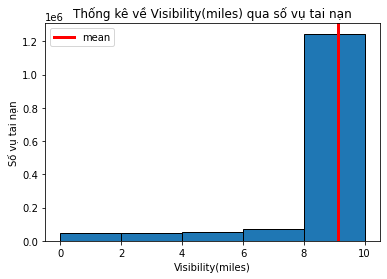

In [27]:
#Cột Visibility(mi)
Mean = accidents_df['Visibility(mi)'].mean()
Median = accidents_df['Visibility(mi)'].median()
Mode = accidents_df['Visibility(mi)'].mode()
print("Giá trị trung bình của Visibility: ", Mean,"miles")
print("Median of Visibility: ",Median,"miles")
print("Mode of Visibility: ",Mode[0],"miles")

#Vẽ biểu đồ histogram để khám phá độ phân bố của tầm nhìn khi xảy ra tai nạn
hist = plt.hist(accidents_df['Visibility(mi)'],[0,2,4,6,8,10], edgecolor = 'black')
plt.xlabel('Visibility(miles)')
plt.ylabel("Số vụ tai nạn")
plt.title("Thống kê về Visibility(miles) qua số vụ tai nạn")
plt.axvline(Mean, color ='red',linewidth = 3, linestyle = 'solid',label = 'mean')
plt.legend()

Trung bình số vụ tai nạn xảy ra đều có mức độ tầm nhìn ở mức gần với 10 cho thấy về tổng quát thì vẫn đề tầm nhìn chưa phải là nguyên nhân quá lớn ảnh hưởng đến  việc xảy ra những vụ tai nạn

## Với mỗi cột có kiểu dữ liệu dạng categorical, các giá trị được phân bố như thế nào ?

In [28]:
def missing_ratio(s):
    return s.isna().mean() * 100
def num_diff_vals(s):
    return s.dropna().nunique()

def diff_vals(s):
    return s.dropna().unique()


In [29]:
cate_cols=list(set(accidents_df.keys())-set(all_num_cols))

index=['missing_ratio', 'num_diff_vals', 'diff_vals']
cate_col_profiles_df=pd.DataFrame(
     index=index,
     columns=cate_cols)
accidents_cate_col_df = accidents_df[cate_cols]
cate_col_profiles_df = accidents_cate_col_df.agg([missing_ratio,num_diff_vals,diff_vals])

print(cate_col_profiles_df)

                                                          Street  \
missing_ratio                                                0.0   
num_diff_vals                                              93048   
diff_vals      [Outerbelt E, I-70 E, I-75 S, US-50 E, I-77 N,...   

              Sunrise_Sunset  \
missing_ratio       0.005475   
num_diff_vals              2   
diff_vals       [Night, Day]   

                                                  Wind_Direction  \
missing_ratio                                           2.760965   
num_diff_vals                                                 24   
diff_vals      [SW, Calm, WSW, WNW, West, NNW, South, W, NW, ...   

              Nautical_Twilight           Stop       Junction       Crossing  \
missing_ratio          0.005475            0.0            0.0            0.0   
num_diff_vals                 2              2              2              2   
diff_vals          [Night, Day]  [False, True]  [False, True]  [False, True]   

    

### Cột City

Số lượng thành phố thu thập được:  10657
Biểu đồ số vụ tai nạn ở 15 thành phố có nhiều vụ tai nạn nhất


<AxesSubplot:>

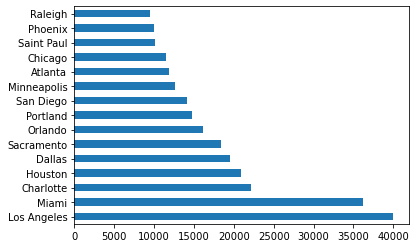

In [30]:
cities_by_accident = accidents_df.City.value_counts()
print("Số lượng thành phố thu thập được: " ,len(cities_by_accident))
print("Biểu đồ số vụ tai nạn ở 15 thành phố có nhiều vụ tai nạn nhất")
cities_by_accident[:15].plot(kind='barh')

Thành phố Los Angeles và Miami có số lượng tai nạn vượt trội hơn so với những thành phố khác

### Cột County

Số lượng quận thu thập được:  1671
Biểu đồ số vụ tai nạn ở 15 quận có nhiều vụ tai nạn nhất


<AxesSubplot:>

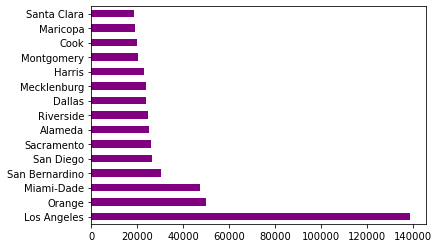

In [31]:
counties_by_accident = accidents_df.County.value_counts()
print("Số lượng quận thu thập được: " ,len(counties_by_accident))
print("Biểu đồ số vụ tai nạn ở 15 quận có nhiều vụ tai nạn nhất")
counties_by_accident[:15].plot(kind='barh',color = 'purple')

Quận Los Angeles có số lượng tai nạn xảy ra nhiều và cách biệt rất lớn so với những quận khác

### Cột Weather_Condition

Số loại thời tiết thu thập được:  116
Biểu đồ 10 loại thời tiết xảy ra nhiều tai nạn nhất


<AxesSubplot:ylabel='Weather_Condition'>

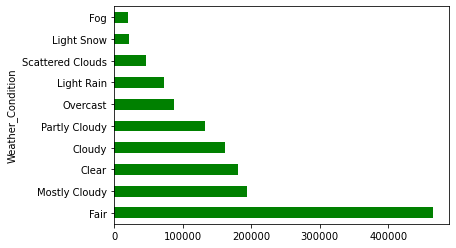

In [32]:
# Lọc ra các vụ tai nạn theo tình hình thời tiết
weather_condition = accidents_df.groupby(['Weather_Condition']).count()['ID'] 
# Vẽ biểu đồ 10 loại thời tiết dễ xảy ra tai nạn nhất
print("Số loại thời tiết thu thập được: " ,len(weather_condition))
print("Biểu đồ 10 loại thời tiết xảy ra nhiều tai nạn nhất")
weather_condition.sort_values(ascending=False)[:10].plot(kind='barh',color = 'green')

Chúng ta có thể thấy điều kiện thời tiết trong các vụ tai nạn giao thông chủ yêu là những thời tiết tốt  do đó có vẻ trong tập dữ liệu này thì điều kiện thời tiết cũng không hẳn là nguyên nhân khiến cho có nhiều vụ tai nạn

## 3. Đặt ra các câu hỏi có ý nghĩa? Giải thích về lợi ích của việc trả lời các câu hỏi này.

- Câu 1: Trong một ngày thì tại những thời điểm nào thường xảy ra những vụ tai nạn giao thông nhất ? Những vụ tai nạn giao thông với mức độ nghiêm trọng khác nhau có xảy ra ở những lúc khác với những thời điểm đó hay không ? 
  + Biết được những thời điểm nào ít xảy ra những vụ tai nạn giao thông
  + Biết được những thời điểm nào thường xuyên xảy ra tai nạn giao thông
  + Hiểu được sự phân bố của mức độ nghiêm trọng của những vụ tai nạn qua các thời điểm trong ngày. Từ đó biết được liệu có những khung giờ nào ngoài giờ cao điểm mà có xảy ra những vụ tai nạn với mức độ nghiêm trọng cao hay không ?
  + Từ đó câu trả lời của câu hỏi ta đưa ra những giải pháp giúp giảm thiểu những vụ tai nạn xuống hết mức có thể tại những thời điểm nguy hiểm trong ngày mà ta đã tìm hiểu được 

- Câu 2: Ánh sáng có tác động đến tầm nhìn đối với các công trình giao thông ở các quận xảy ra nhiều tai nạn hay không?

  + Sau khi trả lời câu hỏi này, ta sẽ biết được liệu ban ngày và ban đêm có ảnh hưởng lớn đến tầm nhìn của lái xe hay không và việc đặt các công trình giao thông trên đã nằm ở nơi dễ nhìn thấy hay chưa. Từ đó, đưa ra các biện pháp cải thiện tầm nhìn nhằm giảm thiểu số vụ tai nạn xảy ra do không có đủ tầm nhìn.
 
- Câu 3: Trong các năm từ 2018 đến 2020, những thành phố nào có nhiều vụ tai nạn xảy ra nhất ? Làm sao để có thể hạn chế tối đa số vụ tai nạn trong các thành phố này?
  + Trả lời được câu hỏi này, ta sẽ tìm ra giải pháp để giảm thiểu số vụ tai nạn xảy ra trong các thành phố nêu trên.



## 4. Tiền xử lí phân tích và trả lời câu hỏi

### Câu hỏi 1: Trong một ngày thì tại những thời điểm nào thường xảy ra những vụ tai nạn giao thông nhất ? Những vụ tai nạn giao thông với mức độ nghiêm trọng khác nhau có xảy ra ở những lúc khác với những thời điểm đó hay không  ?

Lấy ra tổng số vụ tai nạn dựa trên mức độ nghiêm trọng của những vụ tai nạn đó và tính trung bình

   Severity  number_of_acc  percent_acc
0         1          28178     1.858629
1         2        1212382    79.969051
2         3         161052    10.623034
3         4         114452     7.549286


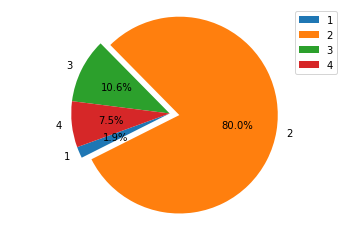

In [33]:
serverity_df=accidents_df.groupby(['Severity']).size().reset_index(name='number_of_acc')
serverity_df['percent_acc'] = (serverity_df['number_of_acc'] / serverity_df['number_of_acc'].sum()) * 100
print(serverity_df)
explode = (0, 0.1, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(serverity_df['percent_acc'], explode=explode, labels=serverity_df['Severity'], autopct='%1.1f%%',
        shadow=False, startangle=200)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


plt.legend()
plt.rcParams["figure.figsize"] = (10,5)
plt.show()

Ta có thể thấy tỉ lệ xảy ra những vụ tai nạn ở mức độ 2 là rất cao khoảng 80% và tỉ lệ xảy ra tai nạn thấp là những vụ tai nạn mức độ 4 khoảng 1.9%, đứng thứ 2 là những vụ tai nạn có mức độ nghiêm trọng là 3 khoảng 10.6% và đứng thứ 3 là những vụ tai có mức độ nghiêm trọng mức độ 4. Ta tiếp tục tìm hiểu xem tỉ lệ xảy ra các vụ tai nạn với mức độ nghiêm trọng có phân bố khác nhau hay giống nhau qua các thời điểm trong một ngày ? Từ đó rút ra kết luận về mức độ xảy ra các vụ tai nạn trong ngày ?

##### Tạo thêm các để tạo thêm các cột ngày, tháng, năm, giờ  bắt đầu xảy ra tai nạn từ cột Start_time
 - Dùng hàm dt của series để tạo thêm các cột ngày, tháng, năm, giờ, phút, ngày trong tuần, tên của ngày trong tuần bắt đầu xảy ra tai nạn từ cột Start_time vì ở đây mình phân tích về thời điểm xảy ra tai nạn giao thông nên nếu lấy các số liệu trên của cột End_Time thì có thể dữ liệu sẽ bị sai lệch khá nhiều do có những vụ tai nạn có khoảng thời gian từ lúc bắt đầu đến kết thúc là khá lâu  

In [34]:
accidents_df['day']=accidents_df['Start_Time'].dt.day
accidents_df['month']=accidents_df['Start_Time'].dt.month
accidents_df['year']=accidents_df['Start_Time'].dt.year
accidents_df['hour']=accidents_df['Start_Time'].dt.hour




print(accidents_df[['day','month','year','hour']])



         day  month  year  hour
0          8      2  2016     0
1          8      2  2016     5
2          8      2  2016     6
3          8      2  2016     6
4          8      2  2016     6
...      ...    ...   ...   ...
1516059   23      8  2019    18
1516060   23      8  2019    19
1516061   23      8  2019    19
1516062   23      8  2019    19
1516063   23      8  2019    18

[1516064 rows x 4 columns]


##### Tổng số tai nạn xảy ra tại các thời điểm ở mỗi ngày trong tuần
 - Tiến hành gom nhóm tạo thành một dataframe mới dựa trên thời điểm giờ trong ngày mà xảy ra vụ tai nạn đó và mức độ nghiêm trọng của vụ tai nạn đó

In [35]:
severity_hour_df=accidents_df.groupby(['Severity','hour']).size().reset_index(name='number_of_acc')

In [36]:
print(severity_hour_df)

    Severity  hour  number_of_acc
0          1     0            306
1          1     1            228
2          1     2            239
3          1     3            227
4          1     4            307
..       ...   ...            ...
91         4    19           4936
92         4    20           4410
93         4    21           3924
94         4    22           3845
95         4    23           3931

[96 rows x 3 columns]


##### Tính tỉ lệ số vụ tai nạn xảy ra theo mức độ nghiêm trọng qua các thời điểm trong ngày

In [37]:
severity_hour_df['percent_number_of_acc']=(severity_hour_df['number_of_acc'] / severity_hour_df['number_of_acc'].sum())*100
print(severity_hour_df)

    Severity  hour  number_of_acc  percent_number_of_acc
0          1     0            306               0.020184
1          1     1            228               0.015039
2          1     2            239               0.015765
3          1     3            227               0.014973
4          1     4            307               0.020250
..       ...   ...            ...                    ...
91         4    19           4936               0.325580
92         4    20           4410               0.290885
93         4    21           3924               0.258828
94         4    22           3845               0.253617
95         4    23           3931               0.259290

[96 rows x 4 columns]


##### Dùng hàm pivot của pandas để chuyển severity thành 4 cột và hour thành các dòng để vẽ biểu đồ line chart

In [38]:
severity_hour_pivot_df=  severity_hour_df.pivot(index='hour', columns='Severity', values='percent_number_of_acc')
print(severity_hour_pivot_df)

Severity         1         2         3         4
hour                                            
0         0.020184  2.520936  0.201641  0.299658
1         0.015039  2.511108  0.149202  0.189570
2         0.015765  2.194301  0.154017  0.195242
3         0.014973  1.722619  0.175454  0.209226
4         0.020250  1.527838  0.175784  0.220505
5         0.038983  2.018780  0.289566  0.298009
6         0.062464  2.981998  0.440021  0.331912
7         0.084693  3.864547  0.561124  0.366607
8         0.092872  3.969687  0.571216  0.366145
9         0.080340  3.051388  0.465482  0.343521
10        0.074865  2.544352  0.390089  0.317863
11        0.088914  2.637026  0.393189  0.303153
12        0.099204  3.859204  0.460733  0.348666
13        0.120707  4.548225  0.489623  0.362320
14        0.125918  4.856391  0.587244  0.377557
15        0.154545  5.228407  0.807090  0.410867
16        0.188910  5.415734  0.943562  0.414494
17        0.187657  5.556560  0.962756  0.417463
18        0.152896  

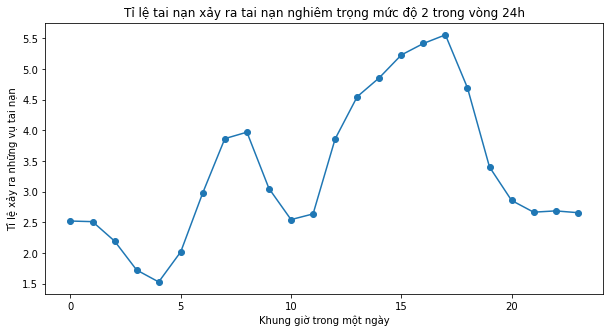

In [39]:
severity_hour_pivot_df[2].plot(marker='o')
plt.xlabel("Khung giờ trong một ngày")
plt.ylabel("Tỉ lệ xảy ra những vụ tai nạn")
plt.title("Tỉ lệ tai nạn xảy ra tai nạn nghiêm trọng mức độ 2 trong vòng 24h")
plt.rcParams["figure.figsize"] = (10,5)
plt.show()

  -  Ta thấy tỉ lệ xảy ra những vụ tai nạn nghiêm trọng ở mức độ 2 có sự phân bố giảm mạnh từ 0h-4h (2.5%-1.5%) sau đó tăng lên từ 5h-8h(4%) rồi giảm từ 9h-11h(2.7%) sau đó tăng dần lên cao nhất ở lúc 17h(5.5%) từ đó giảm dần xuống thấp cho đến 23h(2.7%) rồi tiếp tục giảm cho đến ngày hôm sau

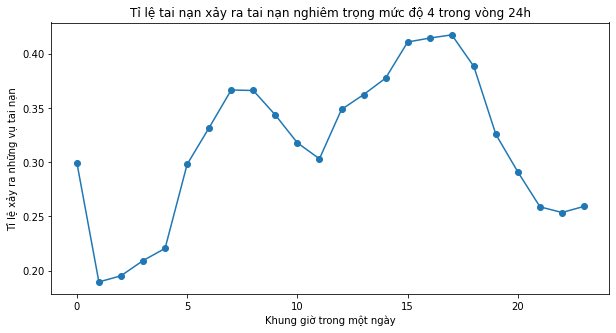

In [40]:
severity_hour_pivot_df[4].plot(marker='o')
plt.xlabel("Khung giờ trong một ngày")
plt.ylabel("Tỉ lệ xảy ra những vụ tai nạn")
plt.title("Tỉ lệ tai nạn xảy ra tai nạn nghiêm trọng mức độ 4 trong vòng 24h")
plt.rcParams["figure.figsize"] = (10,5)
plt.show()

- Tỉ lệ tai nạn mức độ 4 xảy ra qua các khung giờ thì có sự tương đồng so với mức độ 2 về hình dáng biểu đồ cũng giảm xuống thấp từ 0h-4h sau đó tăng đến 8h rồi giảm đến 11h và tăng lên 17h xong rồi giảm xuống nhưng tỉ lệ xảy ra qua các thời điểm thấp hơn nhiều so với những vụ mức độ 2

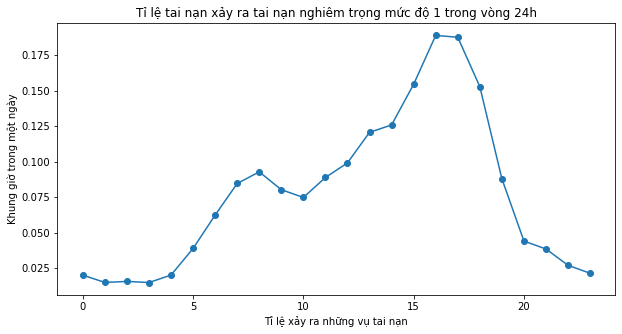

In [41]:
severity_hour_pivot_df[1].plot(marker='o')
plt.xlabel("Tỉ lệ xảy ra những vụ tai nạn")
plt.ylabel("Khung giờ trong một ngày")
plt.title("Tỉ lệ tai nạn xảy ra tai nạn nghiêm trọng mức độ 1 trong vòng 24h")
plt.rcParams["figure.figsize"] = (10,5)
plt.show()

  - Số lượng tai nạn nghiêm trọng ở mức 1 có số lượng xảy ra vào ban đêm đã về một tỉ lệ khá thấp khi so với tỉ lệ cao nhất của nó từ 0h-3h số lượng tai nạn gần như không tăng và cũng không giảm đến 4h bắt đầu thì tăng dần lên đến 8h tuy nhiên khác với 2 biểu đồ trên thì ở biểu đồ mức độ 1 này chỉ giảm nhẹ từ 8h-10h rồi sau đó bắt đầu tăng lên cao nhất ở 16h-17h(0.075%->0.19%) và sau đó giảm cho đến cuối ngày

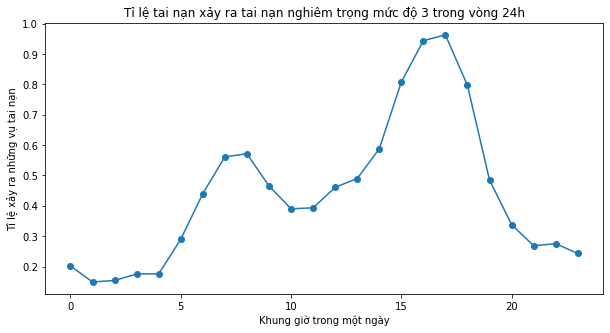

In [42]:
severity_hour_pivot_df[3].plot(marker='o')
plt.xlabel("Khung giờ trong một ngày")
plt.ylabel("Tỉ lệ xảy ra những vụ tai nạn")
plt.title("Tỉ lệ tai nạn xảy ra tai nạn nghiêm trọng mức độ 3 trong vòng 24h")
plt.rcParams["figure.figsize"] = (10,5)
plt.show()

- Tai nạn nghiêm trọng ở mức 3 có số lượng xảy ra vào ban đêm về hình dáng khá tương tự như mức độ 1 từ (20-4h) số vụ tai nạn bắt đâu giảm dần còn số vụ tai nạn từ 9h-11h và lên cao nhất ở khoảng 16-17h tuy nhiên tỉ lệ tai nạn ở mức độ 3 cao hơn so mức độ 1

Để hiểu rõ hơn về sự chênh lệch về sự nghiêm trọng của các vụ tai nạn qua các khung giờ trong ngày thì ta sẽ vẽ cả 4 đường tương ứng với 4 mức độ nghiêm trọng lên 1 biểu đồ

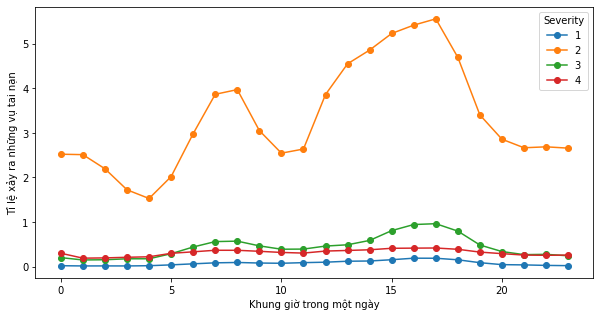

In [43]:
severity_hour_pivot_df.plot(marker='o')
plt.xlabel("Khung giờ trong một ngày")
plt.ylabel("Tỉ lệ xảy ra những vụ tai nạn")
plt.rcParams["figure.figsize"] = (10,5)
plt.show()

Từ đây ta thấy tỉ lệ xảy ra những vụ tai nạn ở mức độ 2 có sự chênh lệch rất lớn ở khoảng 17h là cao nhất khoảng hơn 400% so với 3 mức độ nghiêm trọng còn lại.Tuy nhiên chính vì điều này làm ta chưa thấy rõ được sự phân bố của 3 mức độ tai nạn còn lại khi so sánh với nhau nên ta sẽ vẽ một biểu đồ nữa và bỏ mức độ 2 ra 

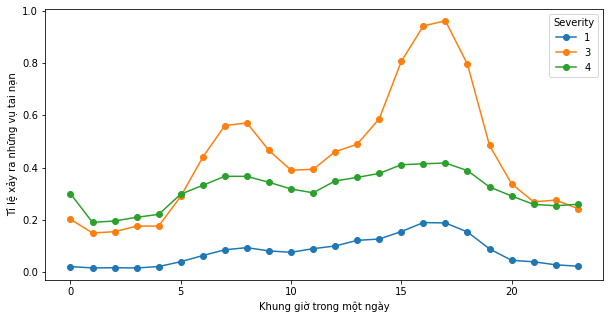

In [44]:
drop_severity_2_df=severity_hour_pivot_df.drop([2], axis=1)
drop_severity_2_df.plot(marker='o')
plt.xlabel("Khung giờ trong một ngày")
plt.ylabel("Tỉ lệ xảy ra những vụ tai nạn")
plt.rcParams["figure.figsize"] = (10,5)
plt.show()

Ta có thể thấy được hầu hết qua các khung giờ thì tỉ lệ xảy ra tai nạn mức độ 3 sẽ cao hơn so với mức độ 4 và mức độ 1 cao nhất 16-17h cao hơn mức độ 3 khoảng 150%. Tuy nhiên ở vào khoảng khung giờ từ 0h-4h thì ta thấy tỉ lệ tai nạn xảy ra của mức độ 4 cao hơn so với mức độ 3 đặc biệt ở lúc khoảng 0h cao hơn khoảng 50%. Điều có thể lý giải bằng việc vào ban đêm thì tầm nhìn hạn chế và mật độ xe trên đường sẽ giảm khi đó các tài xế thường chạy xe mà không quan tâm đến các tín hiệu giao thông, dẫn đến nếu có xảy ra tai nạn thì những vụ tai nạn thì tỉ lệ gây ra thương vong sẽ cao hơn so với những vụ tai nạn phải nhập viện chứ nhưng chưa đến mức chết.

Tổng kết lại thì ta có rút ra kết luận rằng:
- Nếu một ai đó bị tai nạn giao thông thì khả năng người đó chỉ cần dùng một số thuốc hoặc băng bó vết thương nho nhỏ rồi sẽ khỏe hẳn là tương đối cao vì tỉ lệ tai nạn giao thông mức độ 2 có sự chênh lệch rất lớn so với những mức độ khác qua các khung giờ trong ngày và một khi xảy ra tai nạn giao thông thì cũng rất ít người chỉ bị xây xác nhẹ hoặc không bị gì do mức độ 1 chiếm tỉ lệ khá thấp trên biểu đồ. Còn lại là số vụ có người bị thường nặng phải nhập viện và số trường hợp tử vong thì có tỉ lệ gần tương đương với nhau nhưng của mức độ 3 vẫn chiếm tỉ lệ cao hơn ở mức độ 4 đa số các khung giờ. Vì sự phân bố tỉ lệ xảy ra những vụ tai nạn giao thông với 4 mức độ nghiêm trọng có sự tương đồng với nhau về các thời điểm xảy ra nhiều vụ tai nạn và thời điểm xảy ra ít vụ tai nạn.Cụ thể:
    + Những vụ tai nạn sẽ thường xảy ra nhiều nhất vào hai thời điểm trong ngày rồi giảm dần tương ứng với 2 giá trị cực đại của mỗi biểu đồ tương đương với 2 khung giờ cao điểm trong. Đỉnh thứ nhất khoảng 7-8h đây là thời điểm mà mọi người đang trên đường đến nơi việc nên mật độ giao thông trên đường cao và mọi người muốn đến nơi làm việc nhanh vì sợ bị trễ nên dễ xảy ra tai nạn.Đỉnh thứ 2 là 16-17h lúc này mọi người vừa tan ca đang từ nơi làm việc trở về nhà dẫn đến số lượng xe đang chạy trên đường rất nhiều và mọi người cũng muốn về nhanh để được nghỉ ngơi giải tỏa căng thẳng nên thường xảy ra những sự cố đáng tiếc. 
    + Bên cạnh đó ta cũng thấy được những thời điểm mà những vụ tai nạn sẽ giảm xuống đó chỉnh là vào khoảng 10-11h đây là buổi trưa thì lúc này mọi người có xu hướng nghỉ trưa ăn uống tại chỗ làm ít đi lại nên ít xảy ra tai nạn và một thời điểm nữa đó là buổi tồi vào khoảng 2-4h vào thời điểm này tai nạn sẽ xảy ra ở mức thấp nhất trong ngày do lúc đó hầu hết mọi người đều đã đi ngủ ít người đi lại trên đường nên sẽ khó xảy ra tai nạn.
    + Và vẫn có thời điểm vào lúc khoảng 0h thì số lượng tai nạn với mức độ gây thương vong chết người sẽ xãy ra cao hơn số lượng những vụ tai nạn ở mức độ 3.Tuy nhiên nếu so với số lượng tai nạn mức độ nghiêm trọng là 2 thì số lượng này chiếm cũng không quá đáng kể
- Từ đây ta sẽ đưa ra những giải pháp giúp giảm thiểu tai nạn vào những khung giờ nguy hiểm này:
    + Nếu là nhà nước thì cần 
       *  Bố trí các lực lượng chức năng hổ trợ điều phối giao thông trên các tuyến đường vào những thời điểm từ 7-8h và 16-17h giao thông trên đường được thông thoáng hơn ít tai nạn hơn, kèm theo để ý một tí những xe chạy ẩu vào khoảng 0h để tránh những tai nạn đáng tiếc
       * Xây dựng thêm những tuyến đường mới để các xe dễ lưu thông hơn
       * Mở thêm nhiều tuyến xe công cộng vận chuyển được nhiều người cùng lúc để giảm thiểu số lượng xe cộ trên đường lúc giờ cao điểm
    + Nếu là cá nhân thì nên :
       * Đừng quá vội vàng xếp hàng chờ đợi đến lượt cho dù có bị chậm trễ kế hoạch tính mạng của mình vẫn quan trọng hơn
       * Chọn một tuyến đường khác ít xe hơn để đi
       * Chạy xe đúng làn đường cho phép
       * Không chạy quá sát xe phía trước do mật độ lưu thông cao nên khi xe phía trước chạy chậm hoặc phanh lại sẽ rất dễ xảy ra va chạm
       * Chạy chậm và quan sát kĩ nếu như đi vào ban đêm
       * Không vì thiếu sự giám sát của cảnh sát giao thông mà bỏ qua các đèn giao thông, biển báo,...
       * Giữ tinh thần luôn tỉnh táo không để bị buồn ngủ mệt mỏi khi lái xe

### Câu 2: Ánh sáng có tác động đến tầm nhìn đối với các công trình giao thông ở các quận xảy ra nhiều tai nạn hay không?
 - Bước 1: Lọc ra 5 quận có số vụ tai nạn cao nhất.
 - Bước 2: Trong 5 quận này, lọc ra các vụ tai nạn có sự xuất hiện của các công trình giao thông như biển báo, đèn giao thông, ...
 - Bước 3: Tính tỉ lệ các vụ tai nạn xảy ra vào ban ngày và ban đêm sau đó xem xét về tầm nhìn của các lái xe trong các vụ tai nạn này.
 - Bước 4: Trực quan hóa các tỉ lệ đã tính được và rút ra kết luận.

In [45]:
#Lọc ra các cột cần dùng
sign = ['County','Severity','Visibility(mi)','Sunrise_Sunset','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout',
        'Station','Stop','Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']
df = accidents_df[sign]
df_county = accidents_df[['County','Bump']]

#Tìm top 5 thành phố có số vụ tai nạn nhiều nhất 
data = pd.DataFrame(df_county.groupby(["County"]).count())
data.columns = ['Top county']
data = data.sort_values(['Top county'], ascending=False)
data = data.reset_index()
top5 = data['County'].loc[0:4]
top5 = list(top5)

#Lọc ra các vụ tai nạn có sự xuất hiện của các công trình giao thông như biển báo, bùng binh, đén giao thông,... tại 5 khu vực nóng
C_area = df[(df['Bump']==True) | (df['Crossing']==True) | (df['Give_Way']==True) | (df['Junction']==True) | (df['No_Exit']==True) | 
        (df['Railway']==True) | (df['Roundabout']==True) | (df['Station']==True) | (df['Stop']==True) | 
        (df['Traffic_Calming']==True) | (df['Traffic_Signal']==True) | (df['Turning_Loop']==True) ]
C_area = C_area.loc[C_area['County'].isin(top5)]
C_area = C_area.reset_index(drop = True)

#Đầu tiên hãy tìm hiểu về tỉ lệ các vụ tai nạn xảy ra vào ban ngày và ban đêm xem có điều gì bất thường không
Total = len(C_area['County'])
Area = C_area[['Sunrise_Sunset','County']]
Area = Area.groupby('Sunrise_Sunset').count()
Day = Area['County'][0]
Night = Area['County'][1]
#Tính tỉ lệ và lưu vào 2 biến Acc_At_Night, Acc_At_Day
Acc_Night = round((Night / Total),3)
Acc_Day = round((Day / Total),3)
print("Ti le tai nan vao ban dem: ", Acc_Night * 100, '%')
print("Ti le tai nan vao ban ngay: ", Acc_Day * 100, '%')

Ti le tai nan vao ban dem:  37.8 %
Ti le tai nan vao ban ngay:  62.2 %


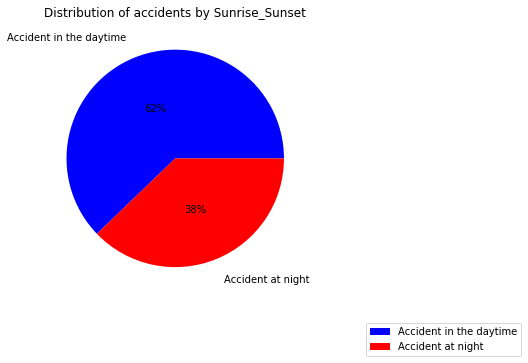

In [46]:
#Biểu đồ tỉ lệ tai nạn vào ban ngày và ban đêm
Arr = [Acc_Day, Acc_Night]
label = ["Accident in the daytime", "Accident at night"]
mycolors = ["blue","red"]
plt.pie(Arr,labels = label, colors = mycolors, autopct='%1.0f%%', pctdistance=0.5, labeldistance= 1.2)
plt.title("Distribution of accidents by Sunrise_Sunset")
plt.legend(bbox_to_anchor=(1,0), loc="right", bbox_transform=plt.gcf().transFigure)

## Nhận xét:
    + Tỉ lệ các vụ tai nạn xảy ra vào ban ngày cao hơn gần như là gấp đôi so với tỉ lệ các vụ tai nạn xảy ra vào ban đêm.
      Điều này không nói lên ánh sáng có ảnh hưởng hay không bởi ta đều biết ban ngày lưu lượng phương tiện nhiều hơn nên
    dễ xảy ra tai nạn hơn.
    + Vào ban ngày thì ánh sáng sẽ nhiều hơn và tầm nhìn sẽ tốt hơn ban đêm rất nhiều khi ban đêm ta phải phụ thuộc vào hệ 
    thống đèn chiếu sáng của phương tiện cũng như là hệ thống đèn công cộng.
    + Để có thể phân tích về sự ảnh hường của ánh sáng, chúng ta sẽ cùng tìm hiểu về tầm nhìn của người gặp tai nạn trước
    khi vụ tai nạn xảy ra.

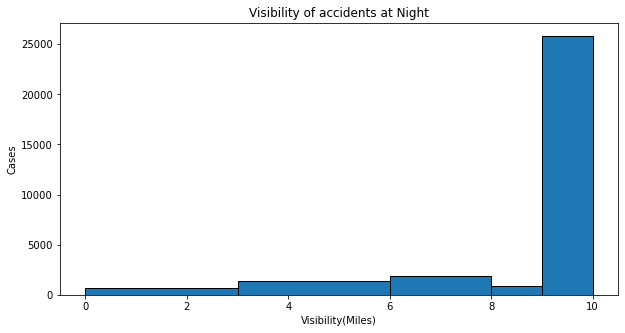

In [47]:
Visibility = C_area[['Sunrise_Sunset','Visibility(mi)']]
Night = Visibility.loc[Visibility['Sunrise_Sunset'] == 'Night']
Night = Night.reset_index(drop = True)
Bad_Sight = Night.loc[Night['Visibility(mi)'] < 8]
hist1 = plt.hist(Night['Visibility(mi)'], [0,3,6,8,9,10], edgecolor = 'black')
plt.xlabel("Visibility(Miles)")
plt.ylabel("Cases")
plt.title("Visibility of accidents at Night")
BS_ratio = round(len(Bad_Sight['Visibility(mi)']) / len(Night['Visibility(mi)']),3)


Text(0.5, 1.0, 'Visibility of accidents in the Daytime')

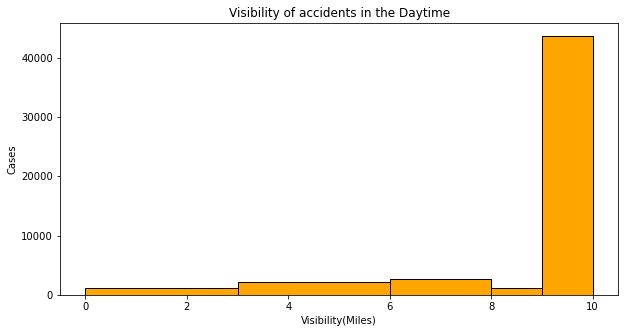

In [48]:
Day = Visibility.loc[Visibility['Sunrise_Sunset'] == 'Day']
hist2 = plt.hist(Day['Visibility(mi)'], [0,3,6,8,9,10], color = "orange", edgecolor = 'black')
plt.xlabel("Visibility(Miles)")
plt.ylabel("Cases")
plt.title("Visibility of accidents in the Daytime")

## Nhận xét:
   - Như vậy nhận định về việc hệ thống chiếu sáng của phương tiện và công cộng Không làm ảnh hưởng nhiều lắm đến các vụ tai nạn như ta đã suy đoán.
   - Dựa vào biểu đồ ta có thể thấy tầm nhìn bất kể ban ngày hay ban đêm đều ở mức ở rất cao. Điều này nói lên hệ thống chiếu sáng vẫn hoạt động khá tốt và việc nhìn thấy các công trình giao thông có thể nói là ở mức khá tốt.
   - Một số vụ tai nạn xảy ra do tầm nhìn kém có thể là do:
            + Ở một số điểm hệ thống đèn gặp trục trặc bất ngờ nên không thể xử lý kịp.
            + Người lái xe ở trong tình trạng không tỉnh táo.
            + Thị lực có thể gặp vẫn đề như cận thị.
            + Thời tiết làm ảnh hưởng đến tầm nhìn.
   - Với mức tầm nhìn gần như là tốt nhất từ 9-10 thì các vụ tai nạn lại xảy ra nhiều nhất, điều này có thể là do:
            + Lỗi bất cẩn, mất tập trung khi lái xe.
            + Người lái xe sử dụng chất kích thích, không làm chủ được bản thân.
            + Thời tiết tác động đến khả năng làm chủ phương tiện.
            + Phương tiện hư hỏng bất ngờ.    
            
      

## Mở rộng cho câu hỏi:

In [49]:
#Tính toán tỉ lệ tai nạn do tầm nhìn kém về đêm gây ra
Visibility = C_area[['County','Sunrise_Sunset','Visibility(mi)','Severity']]
Night = Visibility.loc[Visibility['Sunrise_Sunset'] == 'Night']
Night = Night.reset_index(drop = True)
Bad_Sight = Night.loc[Night['Visibility(mi)'] < 5]
print('Số vụ tai nạn do tầm nhìn kém (< 5): ',len(Bad_Sight['Visibility(mi)']))
print('Số vụ tai nạn vào ban đêm: ', len(Night['Visibility(mi)']))
BS_ratio = round(len(Bad_Sight['Visibility(mi)']) / len(Night['Visibility(mi)']),3)
print('Tỉ lệ tai nạn về đêm do tầm nhìn kém: ', BS_ratio*100, '%')

Số vụ tai nạn do tầm nhìn kém (< 5):  1489
Số vụ tai nạn vào ban đêm:  31512
Tỉ lệ tai nạn về đêm do tầm nhìn kém:  4.7 %


Text(0.5, 1.0, 'Distribution of bad visibility at night ')

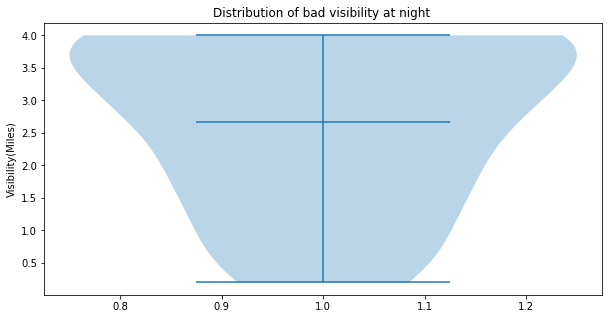

In [50]:
#Vẽ biểu đồ để trực quan về sự phân bố 
Bad_Sight = Night.loc[Night['Visibility(mi)'] < 5]
Bad_Sight = Bad_Sight.loc[Night['Severity'] == 4]
plt.violinplot(Bad_Sight['Visibility(mi)'], showmeans=True)
plt.ylabel("Visibility(Miles)")
plt.title("Distribution of bad visibility at night ")

In [51]:
#Tìm ra thành phố có nhiều vụ tai nạn về ban đêm do tầm nhìn kém nhất để thí điểm lắp thêm đèn đường
Bad_Sight = Bad_Sight.groupby('County').count()
Top_county = pd.DataFrame(Bad_Sight["Severity"])
Top_county = Top_county.rename(columns={'Severity': 'Num_Cases'})
Top_county = Top_county.reset_index()
print(Top_county)

        County  Num_Cases
0  Los Angeles         29
1   Miami-Dade          2
2       Orange          5
3    San Diego          3


## Đề xuất thí điểm lắp thêm đèn công cộng ở Los Angeles:
 - Tuy số vụ tai nạn nghiêm trọng về đêm khá thấp khi chỉ ở mức 4.7% nhưng chúng ta có thể giảm thiểu số vụ tai nạn này bằng cách thí điểm đặt thêm một số đèn công cộng tại những nơi xảy ra tai nạn ở thành phố Los Angeles.
 - Sau đó, ta sẽ thu thập số liệu về các vụ tai nạn ở thành phố này về đêm xem có giảm không rồi sẽ tính toán xa hơn cho các thành phố khác.

### Câu 3:  Trong các năm từ 2018 đến 2020, những thành phố nào có nhiều vụ tai nạn xảy ra nhất ? Làm sao để có thể hạn chế tối đa số vụ tai nạn trong các thành phố này?

Ở đây em làm thêm cái biến third_years_newest để lọc lấy ra các phần tử chỉ thuộc năm đó (vd: 2018-2020) vì lúc đầu tụi em tính làm 3 năm nhưng cuối cùng lại quyết định làm hết 5 năm nhưng em vẫn để lại biến này để tiện cho việc nếu sau này có thay đổi
Sau đó groupy theo các thành phố và năm và lấy hàm count để đếm số vụ tai nạn của mỗi thành phố từ năm 2016-2020
Cuối cùng ta se có được số vụ tai nạn của mỗi thành phố qua từng năm dưới dạng series và sử dụng unstack để chuyển sang dạng ngang
Công việc còn lại em chỉ cần lấy sum của dòng từ năm 2016-2020 và thực hiện sắp xếp giảm dần là em sẽ có được top 5 thành phố có tổng số vụ tai nạn cao nhất.

In [52]:
newest_year_data=accidents_df["year"]
third_years_newest=newest_year_data
after_equal_third_years=third_years_newest <=accidents_df['year']
top_county_each_year_df=accidents_df.loc[after_equal_third_years]
top_county_each_year_df=top_county_each_year_df.groupby(by=["City","year",]).count()
county_temp=top_county_each_year_df["ID"]
top_county_each_year_df=pd.Series(data=county_temp)
top_county_each_year_df=top_county_each_year_df.unstack(0)
sort_county=top_county_each_year_df.sum(axis = 0, skipna = True)
sort_county=sort_county.sort_values(ascending=False)
sort_county=pd.DataFrame(sort_county.iloc[0:3])
index=sort_county.index
a_list = list(index)

In [53]:
sort_county

,0
City,
Los Angeles,39984.0
Miami,36233.0
Charlotte,22203.0


Bây giờ ta đã có được top 3 thành phố có tổng số ca tai nạn giao thông cao nhất từ năm 2016-2020, Tiếp theo em sẽ vẽ biểu đồ thể hiện sự tăng trưởng của 5 thành phố qua từng năm để biết rõ hơn được về tình hình chung của mỗi thành phố và xem thử liệu có sự bất ổn nào từ năm 2016-2020 ở mỗi thành phố hay không ?

<AxesSubplot:xlabel='year'>

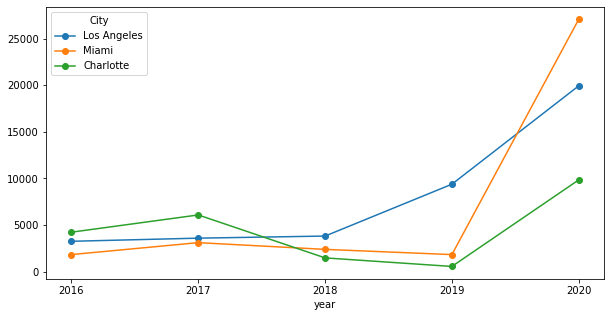

In [54]:
plot1=top_county_each_year_df[a_list].plot(marker='o')
plot1.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.rcParams["figure.figsize"] = (10,5)
plot1

### Nhận xét
- Nhìn vào biểu đồ ta có thể thấy tốc độ tăng trường về số ca tai nạn giao thông của 5 nước có tổng số tai nạn giao thông cao nhất qua 5 năm 2016-2020
  + Ta có thể thấy ở đây trong 5 thành phố thì chỉ có Los Angeles là có số lượng tăng không giảm xuyên suốt từ năm 2016-2020
  + Los Angeles tăng đều qua các năm từ 2016-2020 và có 20000 ca tai nạn giao thông gấp gần 2 lần so với 1 năm trước
  + Nhìn qua thành phố đứng hạng 2 Miami thì ta thấy một điều đặc biệt ở đây đó là thành phố này có khoảng 2000 ca ở năm 2016 sau đó tăng lên 3000 ở năm 2017 và giảm xuống khoảng 2000 ca năm 2019 nhưng lại đột ngộ tăng mạnh ở năm 2020 tới khoảng 26000 tức gấp 13 lần so với 1 năm trước đây là một dấu hiệu đáng báo động
  + Thành phố Charlotte cũng giảm mạnh ở hai năm 2018-2019 và bắt đầu tăng mạnh ở năm 2020 với khoảng 8000 ca gấp 8 lần so với năm 2019
  +  Tóm lại số ca tai nạn giao thông mỗi năm từ top 2-5 đều theo một xu hướng là tăng ở năm 2016-2017, giảm ở năm 2018-2019 và tăng mạnh ở năm 2020 ngoại trừ Los Angeles là tăng đều qua từng năm và tăng mạnh ở năm 2020
- Ý nghĩa câu hỏi :
  + Việc tìm hiểu tốc độ tăng trưởng về số ca tai nạn giao thông của mỗi nước  giúp chúng ta biết được thành phố nào xảy ra nhiều vụ tai nạn nhất để ưu tiên giải quyết cho thành phố đó và có cái nhìn sâu hơn về vấn đề này chẳng hạn như biết được ở cả 5 thành phố thì đều có dấu hiệu tăng cao ở năm 2020 từ đó cần nổ lực hơn để khắc phục vấn đề này
  + Ngoài ra thì ta phát hiện được điểm bất thường ở thành phố Miami khi ở thành phố này đột nhiên lại có sự tăng trưởng bất thường từ năm 2019-2020 để từ đó có sự tập trung cần thiết hơn vào thành phố này 
  + Vậy làm sao để ta có thể hạn chế tai nạn giao thông ở những thành phố này ?
  + Để làm được việc này em sẽ vẽ các con đường có tainạn giao thông ở các thành phố để xem thử đường nào có nhiều vụ tai nạn giao thông
  + Để từ đó vạch ra những biện pháp hiệu quả để giải quyết vấn đề này 

In [55]:
top_county_each_year_df[a_list]

City,Los Angeles,Miami,Charlotte
year,,,
2016,3259.0,1834.0,4235.0
2017,3595.0,3113.0,6084.0
2018,3820.0,2392.0,1479.0
2019,9380.0,1832.0,561.0
2020,19930.0,27062.0,9844.0


- Country_df để lấy ra thông tin thành phố top 1 trong top các thành phố có vụ tai nạn cao nhất
- Street_df để lọc ra các thông tin cần thiết và đếm số vụ tai nạn trên mỗi con đường qua từng năm

In [56]:
country_df=accidents_df[accidents_df['City']==a_list[0]]
street_df=country_df.groupby(['City','County','Street']).size().reset_index(name='number_of_acc')

- street_df để sort ra các con đường có tổng số vụ tai nạn cao nhất ở thành phố Los Angeles
- top_street để lấy ra top 5 con đường ở thành phố này 

In [57]:
street_df=street_df.sort_values(by='number_of_acc', ascending=False).reset_index()
top_street=pd.DataFrame(street_df.loc[0:4])
print(top_street)

   index         City       County              Street  number_of_acc
0    855  Los Angeles  Los Angeles              I-10 E           2199
1    856  Los Angeles  Los Angeles              I-10 W           2183
2    842  Los Angeles  Los Angeles  Golden State Fwy S           1570
3    846  Los Angeles  Los Angeles        Harbor Fwy N           1435
4    863  Los Angeles  Los Angeles               I-5 N           1405


street_df2 để lấy ra các thông tin của thành phố Los Angeles nhưng lần này có thêm biến year (sở dĩ ở trên không lấy year vì em chỉ muốn lấy tổng số vụ tai nạn trên các con đường) ở đây em sẽ lấy year từ năm 2018-2020
Vòng lặp chạy theo độ dài của top_street (ở đây là bằng 5 vì em lấy ra top 5 con đường nguy hiểm nhất ở trên)
Biến temp để lấy ra thông tin của con đường từ data street_df2 bao gồm year
Sau đó sử dụng vòng lặp thứ 2 để kiểm tra xem con đường này không có vụ tai nạn ở năm nào không vì nếu không có vụ tai nạn nào thì sẽ không có dòng đó (vd con đường này không có vụ tai nạn ở năm 2019 thì sẽ chỉ có 4 dòng thay vì 5 dòng (2016-2020)) nếu không có thì gán biến 0 vào list y_2018-2020, nếu như có thì append số vụ tai nạn của con đường này vào 3 list đã chuẩn bị sẵn (nếu 2018 thì append vào y1_2018....) index temp[j][3] để kiểm tra năm , index temp[j][4] để lấy số vụ tai nạn của năm đó

In [58]:
street_df2=country_df.groupby(['City','County','Street','year']).size().reset_index(name='number_of_acc')
street_df2['number_of_acc']=street_df2['number_of_acc'].fillna(0)
not_have_car_acc=0
y1_2018=[]
y2_2019=[]
y3_2020=[]
for i in range(len(top_street)):
    check_2018=0
    check_2019=0
    check_2020=0
    temp=street_df2.loc[street_df2['Street'] == top_street['Street'][i]].values
    #print(temp)
    for j in range (len(temp)):
         #temp[j][3] index 3 là năm
        if (temp[j][3]==2018):
                check_2018=1
                y1_2018.append(temp[j][4])
        if (temp[j][3]==2019):
                check_2019=1
                y2_2019.append(temp[j][4])
        if (temp[j][3]==2020):
                check_2020=1
                y3_2020.append(temp[j][4])
    if (check_2018 == 0):
         y1_2018.append(not_have_car_acc)
    if (check_2019 == 0):
         y2_2019.append(not_have_car_acc)
    if (check_2020 == 0):
         y3_2020.append(not_have_car_acc)

- Sau khi đã có thông tin của 3 năm của các con đường có vụ tai nạn cao nhất thì việc còn lại chỉ việc vẽ biểu đồ để phân tích

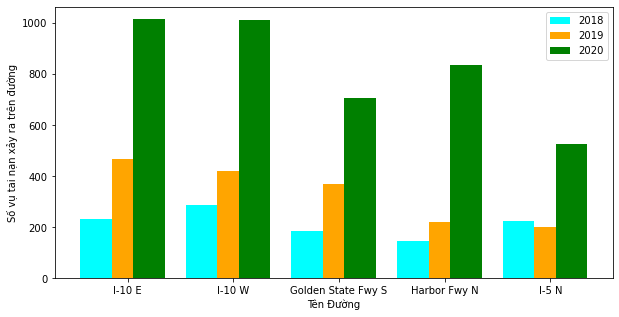

In [59]:
x = np.arange(5)
width = 0.3
# plot data in grouped manner of bar type
plt.bar(x-0.3, y1_2018, width, color='cyan')
plt.bar(x, y2_2019, width, color='orange')
plt.bar(x+0.2, y3_2020, width, color='green')
plt.xticks(x,top_street['Street'])

plt.xlabel("Tên Đường")
plt.ylabel("Số vụ tai nạn xảy ra trên đường")
plt.legend(["2018", "2019", "2020"])
plt.rcParams["figure.figsize"] = (10,5)
plt.show()

- Nhìn chung số vụ tai nạn xảy ra ở top 5 những con đường xảy ra nhiều vụ tai nạn nhất thành phố Los Angeles có sự chênh lệch nhưng không quá lớn ở các tuyến đường năm 2020 
- Ta có thể thấy hầu như các đường ở năm 2020 đều tăng khoảng gần gấp 2 lần so với các nằm 2018 và 2019
- Về phía đường cao tốc I-10 thì tăng hơn 2 lần so với năm 2019 và khoảng 4 lần ở năm 2018 ở cả hai hướng Đông và Tây với khoảng gần 1000 vụ vào năm 2020
- Đường Golden State Fwy S tuy có tổng số vụ tai nạn cao hơn Harbor Fwy N nhưng đường Harbor Fwy N lại có sự tăng trưởng đột biến ở năm 2020 với hơn 800 vụ tai nạn gấp 4 lần so với 2 năm 2018-2019
- Đường I-5N cũng không có gì khác biệt so với các tuyến đường còn lại khi ở năm 2020 con đường này cũng có khoảng hơn 500 vụ gấp 2.5 lần so với năm 2018-2019
- Điểm chung của các tuyến đường này đều có số vụ tai nạn vượt quá 200 vụ ở năm 2019, tăng mạnh ở năm 2020 và đặc biệt hầu như đều là đường cao tốc, đây là điểm chúng ta cần phải chú ý 

- Phần còn lại thì chỉ việc thực hiện y hệt các bước như ở bên trên cho 2 thành phố còn lại là xong

In [60]:
country_df=accidents_df[accidents_df['City']==a_list[1]]
street_df=country_df.groupby(['City','County','Street']).size().reset_index(name='number_of_acc')
street_df=street_df.sort_values(by='number_of_acc', ascending=False).reset_index()
top_street=pd.DataFrame(street_df.loc[0:4])
print(top_street)

   index   City      County           Street  number_of_acc
0   1125  Miami  Miami-Dade           I-95 N           3267
1   1126  Miami  Miami-Dade           I-95 S           3210
2    652  Miami  Miami-Dade     SW 137th Ave           1118
3   1384  Miami  Miami-Dade  Palmetto Expy N           1041
4   1082  Miami  Miami-Dade   Dolphin Expy E           1020


In [61]:
street_df2=country_df.groupby(['City','County','Street','year']).size().reset_index(name='number_of_acc')
street_df2['number_of_acc']=street_df2['number_of_acc'].fillna(0)
not_have_car_acc=0
y1_2018=[]
y2_2019=[]
y3_2020=[]
for i in range(len(top_street)):
    check_2018=0
    check_2019=0
    check_2020=0
    temp=street_df2.loc[street_df2['Street'] == top_street['Street'][i]].values
    #print(temp)
    for j in range (len(temp)):
         #temp[j][3] index 3 là năm
        if (temp[j][3]==2018):
                check_2018=1
                y1_2018.append(temp[j][4])
        if (temp[j][3]==2019):
                check_2019=1
                y2_2019.append(temp[j][4])
        if (temp[j][3]==2020):
                check_2020=1
                y3_2020.append(temp[j][4])
    if (check_2018 == 0):
         y1_2018.append(not_have_car_acc)
    if (check_2019 == 0):
         y2_2019.append(not_have_car_acc)
    if (check_2020 == 0):
         y3_2020.append(not_have_car_acc)
print(y1_2018)

[410, 448, 2, 119, 149]


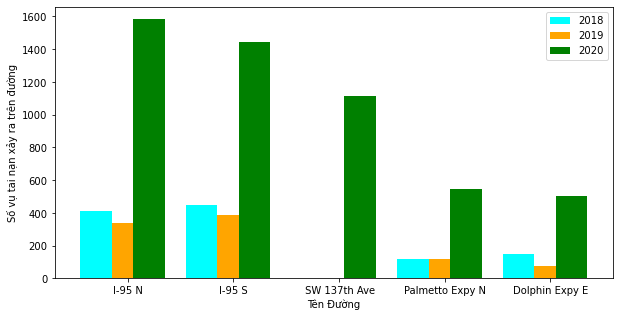

In [62]:
x = np.arange(5)
width = 0.3
# plot data in grouped manner of bar type
plt.bar(x-0.3, y1_2018, width, color='cyan')
plt.bar(x, y2_2019, width, color='orange')
plt.bar(x+0.2, y3_2020, width, color='green')
plt.xticks(x,top_street['Street'])
plt.xlabel("Tên Đường")
plt.ylabel("Số vụ tai nạn xảy ra trên đường")
plt.legend(["2018", "2019", "2020"])
plt.rcParams["figure.figsize"] = (10,5)
#plt.ylim((25,1500))
plt.show()

- Khác với thành phố Angeles, ta có thể thấy ở top 5 con đường xảy ra nhiều vụ tai nạn nhất ở thành phố Miami có sự chênh lệch khá lớn ở top 1 và 2 chung một con đường là I-95 nhưng với hai hướng Bắc Nam trong tồng số ca tai nạn giao thông ở cả 3 năm 2018-2020 so với các top còn lại  
- Chỉ tính riêng ở hai nằm 2018 và 2019 thì đường cao tốc I-95 đã hơn rất nhiều so với các đường còn lại, quả không hổ danh là con đường tử thần ở Mỹ
- Ở đường I-95 có hơn 1600 vụ hơn 600 ca so với con đường I-10 ở thành phố Los Angeles ở năm 2020
- Ngoài con đường tử thần I-95 thì ta cần phải đặc biệt chú ý ở đường SW 137th Ave. Tuy ở năm 2018-2019 hầu như không có ca tai nạn giao thông nào nhưng năm 2020 lại có tới khoảng hơn 1000 vụ tai nạn, không biết có điều gì bất thường xảy ra ở con đường này trong năm 2020 hay không ? 
- Ở hai con đường còn lại cũng xấp xỉ ở cả ba năm với hơn 400 vụ ở năm 2020 và gấp khoảng 4 lần so với năm 2018-2019
- Và một lần nữa thì cả 5 vị trí có nhiều vụ tai nạn nhất này đều là đường cao tốc

In [63]:
country_df=accidents_df[accidents_df['City']==a_list[2]]
street_df=country_df.groupby(['City','County','Street']).size().reset_index(name='number_of_acc')
street_df=street_df.sort_values(by='number_of_acc', ascending=False).reset_index()
top_street=pd.DataFrame(street_df.loc[0:4])
print(top_street)

   index       City       County       Street  number_of_acc
0   1127  Charlotte  Mecklenburg       I-77 N            853
1   1128  Charlotte  Mecklenburg       I-77 S            716
2    767  Charlotte  Mecklenburg   S Tryon St            520
3   1130  Charlotte  Mecklenburg       I-85 S            494
4   1129  Charlotte  Mecklenburg       I-85 N            423


In [64]:
street_df2=country_df.groupby(['City','County','Street','year']).size().reset_index(name='number_of_acc')
street_df2['number_of_acc']=street_df2['number_of_acc'].fillna(0)
not_have_car_acc=0
y1_2018=[]
y2_2019=[]
y3_2020=[]
for i in range(len(top_street)):
    check_2018=0
    check_2019=0
    check_2020=0
    temp=street_df2.loc[street_df2['Street'] == top_street['Street'][i]].values
    #print(temp)
    for j in range (len(temp)):
         #temp[j][3] index 3 là năm
        if (temp[j][3]==2018):
                check_2018=1
                y1_2018.append(temp[j][4])
        if (temp[j][3]==2019):
                check_2019=1
                y2_2019.append(temp[j][4])
        if (temp[j][3]==2020):
                check_2020=1
                y3_2020.append(temp[j][4])
    if (check_2018 == 0):
         y1_2018.append(not_have_car_acc)
    if (check_2019 == 0):
         y2_2019.append(not_have_car_acc)
    if (check_2020 == 0):
         y3_2020.append(not_have_car_acc)
print(y1_2018)

[110, 96, 32, 76, 47]


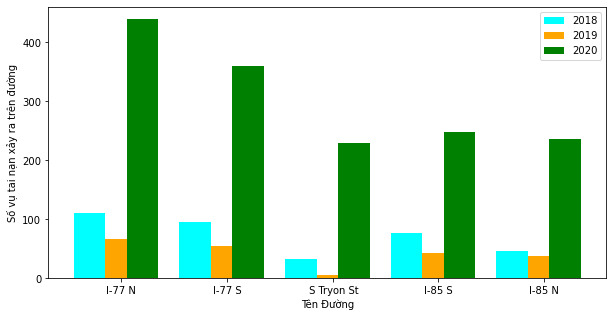

In [65]:
x = np.arange(5)
width = 0.3
# plot data in grouped manner of bar type
plt.bar(x-0.3, y1_2018, width, color='cyan')
plt.bar(x, y2_2019, width, color='orange')
plt.bar(x+0.2, y3_2020, width, color='green')
plt.xticks(x,top_street['Street'])
plt.xlabel("Tên Đường")
plt.ylabel("Số vụ tai nạn xảy ra trên đường")
plt.legend(["2018", "2019", "2020"])
plt.rcParams["figure.figsize"] = (10,5)
#plt.ylim((25,1500))
plt.show()

- Cũng như thành phố Miami, con đường có nhiều vụ tai nạn nhất ở thành phố Charlotte cũng là đường xa lộ i-77 ở ca hai hướng Bắc Nam với phía Bắc khoảng hơn 400 ca và phía Nam hơn 300 ca ít hơn 100 ca trong năm 2020
- top 3 4 5 lần lượt là đường S Tryon St với khoảng 230 ca, đường cao tốc I-85 hướng Nam là 250 vụ và hướng Bắc là 240 vụ ở năm 2020
-  Tuy nhiên khác với hai thành phố trên thì thành phố Charlotte không có con đường nào vượt quá 500 vụ tai nạn mặc dù số vụ tai nạn ở thành phố này năm 2020 cũng tăng khá cao và các con đường cũng toàn là đường cao tốc

### Tổng kết
- Với 3 biểu đồ trên ta có thể thấy được các vụ tai nạn giao thông đều xảy ra ở các con đường cao tốc và vào năm 2020 các vụ tai nạn ở các con đường đều tăng vượt trội so với các năm còn lại 
- Từ những phương hướng trên tụi em đã tìm hiểu được vì sao những tuyến đường cao tốc lại thường xảy ra tai nạn để từ đó có cách thức khắc phục hiệu quả
- thứ nhất hầu hết những người lái xe trên con đường này đều chạy với tốc độ 80km/h cmà khi chạy tốc độ nhanh mà quá êm như vậy thì thường khiến nhiều người chủ quan để từ đó không giảm ga mà cứ giữ nguyên tốc độ như vậy thì việc xảy ra tai nạn chỉ là chuyện sớm muộn
- Thứ hai chỉ một sai lầm nhỏ trên đường cao tốc thôi cũng có thể xảy ra tai nạn ví dụ như Chỉ một xe chết máy đột ngột, hay dừng đón trả khách cũng có thể dẫn đến tai ví dụ như mới đây nhất có một vụ tai nạn giao thông ở tuyến đường cao tốc i-110 ở Los Angeles ban đầu có một chiếc xe bị tai nạn giao thông do vụ va chạm ở giữa đường sau đó lần lượt thêm một vài chiếc xe khác vì không làm chủ được tốc độ mà đâm vào chiếc xe đó, cuối cùng tổng cộng có khoảng 6 phương tiện giao thông tham gia vào vụ va chạm này (nguồn : https://www.youtube.com/watch?v=-9yqXzZ16ns)
- Ở đường cao tốc cũng có nhiều làn đường hơn cần phải chú ý đòi hỏi người lái xe cần phải có sự tập trung cao độ
- Ngoài ra họ còn có nhiều khả năng vượt quá tốc độ cho phép, lái xe trong tình trạng say rượu, không thắt dây an toàn và sự xuất hiện ngày càng nhiều của người đi bộ và đi xe đạp.
#### Đưa ra giải pháp
- Từ những thông tin đã có được ở trên tụi em đã đưa ra một số giải pháp nhằm khắc phục tình trạng gia tăng của những vụ tai nạn giao thông ở các thành phố (không chỉ áp dụng ở mỗi đường cao tốc)
- sớm kiểm tra thực tế hiện trường đối với các chỉ tiêu kỹ thuật không đạt tiêu chuẩn của tuyến cao tốc về dải an toàn, hành lang an toàn, độ bằng phẳng
- đối với những người tham gia giao thông ý thức kém cần phải xử phạt nghiêm, nhất là xe tải, xe khách, đối tượng chính gây ra tai nạn giao thông trên đường cao tốc. Tuyên truyền đến các đối tượng này Quy chế khai thác đường về phân làn xe, tốc độ tối đa (V max)... Đặc biệt là cự ly an toàn giữa các xe ô tô
- đặt biển giao thông cảnh báo người lái xe đoạn đường này thường xảy ra tai nạn để người lái xe có cảnh giác trước
- Đặt biển giao thông giới hạn tốc độ chạy của người lái xe
- Cử thêm nhiều cảnh sát giao thông hơn ở những đoạn đường thường xảy ra tai nạn 
- Đặt thêm các đèn tín hiệu giao thông 
- Lập ra Chiến dịch tuyên truyền / quảng bá về an toàn đường bộ ở những đoạn đường dễ gây ra tai nạn ở mỗi thành phố thông qua các phương tiện điện tử và báo in.
- Kiểm tra và bảo vệ các cơ sở hạ tầng đường bộ biển báo,đèn đường, vạch kẻ đường, cọc tiêu, cột cây số, hành lang an toàn đường bộ hay hành lang an toàn bị lấn chiếm
- Cấp thêm nguồn tài chính và Thường xuyên bảo trì đường bộ ở những đoạn đường dễ gây ra tai nạn
- Giảm số lượng xe đi vào đoạn có nhiều tai nạn cũng 1 lúc 
- Kiểm tra các hệ thống thoát nước và điều chỉnh hệ thống thoát nước sao cho thích hợp ở những đoạn đường nguy hiểm
- Thêm gò giảm tốc ở con đường thường gây ra tai nạn
- Tập trung vào các đoạn đường như ở biểu đồ trên thể hiện nhất là sự gia tăng bất thường của đoạn đường SW 137th Ave khi mà đoạn đường này hầu như có rất ít hoặc không có vụ tai nạn nào trong năm 2018-2019 nhưng lại tăng đột ngột ở năm 2020 

## 5.Nhìn lại

### Mỗi thành viên gặp những khó khăn gì
Khó khăn của mỗi cá nhân:
 - Thành An: 
   + Khó khăn trong việc sử dụng các thư viện để phân tích dữ liệu
   + Vất vả trong việc tìm cách up file với dữ liệu hỏn 100MB lên github
   + Buộc phải bỏ phần vẽ biểu đồ plotly do không hiển thị được trên github
   + Chịu áp lực rất lớn từ việc thi cử và phân phân giữa việc tập trung vào đồ án hay là ôn thi
           
 - Tâm Anh:  
   + Gặp một chút khó khăn trong việc suy nghĩ những câu hỏi sao cho theo hướng thực tế và ý nghĩa hơn 
   + Phải tìm hiểu thêm trên mạng, đọc các bài báo về các vụ tai nạn để khi vẽ xong biểu đồ có thể phát hiện được nhiều điều hơn để từ đó có thể trả lời được câu hỏi sao cho hợp lý
   + Cũng như là phải tìm hiểu thêm về các loại biểu đồ khác nhau và các câu lệnh để vẽ ra biểu đồ đó để đồ án được đa dạng hơn
   + Ngoài ra thì em cũng có gặp một chút về việc triển khai trên git hub khi mà dung lượng file đồ án khá lớn nhưng vấn đề đã được tụi em khắc phục
 - Minh Thiện:
   + Thời gian thi cử cộng kem với deadline của nhiều môn học dẫn đến việc chưa thể hoàn thành tốt được đồ án
   + Mất nhiều thời gian để tìm hiểu về các thư viện mới.
   + Một số thuộc tính cần cho nghiên cứu sâu về câu hỏi còn bị hạn chế.


### Những điều được hiểu biết thêm
   - Thành An:
     + Biết được cách tạo nhánh và hợp nhánh trên git hub
     + Đọc được nhiều tài liệu hiểu biết nhiều hơn về các vụ tai nạn giao thông
     + Nâng cao khả năng làm việc nhóm
   - Tâm Anh:
     + Có thêm kỹ năng về thống kê số liệu
     + Rèn luyện được tính kiên trì của bản thân để hoàn thành hết những deadline
     + Có những bước tiến đầu tiên vào ngành Khoa Học Dữ liệu
   - Thiện:
     + Biết sử dụng một số công cụ trực quan như plotly, matplotib, seaborn
     + Có thêm khả năng phân chia thời gian hợp lí khi khối lượng công việc và kiến thức tiếp thu ngày càng nhiều
     + Nâng cao khả năng đọc hiểu tiếng anh khi tìm hiểu về các tài liệu

## 6.Tài liệu tham khảo
 - https://www.kaggle.com/sobhanmoosavi/us-accidents
 - https://scholarworks.lib.csusb.edu/cgi/viewcontent.cgi?article=2085&context=etd
 - https://stackoverflow.com/
 - https://www.asirt.org/safe-travel/road-safety-facts/